# SVM и его ядра
__Суммарное количество баллов: 10__

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [64]:
def visual_svm(X, y, kernel='linear', degree=2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = svm.SVC(kernel=kernel, C=1, gamma=1, degree=degree)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    print('Accuracy: ', sum(predicted == y_test)/len(y_test))
    sup_vecs_x, sup_vecs_y = model.support_vectors_[:, 0], model.support_vectors_[:, 1]
    
    x_min, x_max = X['x'].min() - 2, X['x'].max() + 2
    y_min, y_max = X['y'].min() - 2, X['y'].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(figsize=(10, 8))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    palette = ['darkcyan', 'r']
    classes = [0, 1]
    color_map = dict(zip(classes, palette))
    colors = y_test.apply(lambda x: color_map[x])
    
    axarr.contourf(xx, yy, Z, alpha=0.4, colors=['lightcyan', 'papayawhip', 'k'], extend='both')
    axarr.scatter(X_test['x'], X_test['y'], c=colors, s=20)
    axarr.scatter(sup_vecs_x, sup_vecs_y, marker='*', color='black', s=20)
    plt.show()

## kernel = linear

Accuracy:  0.97


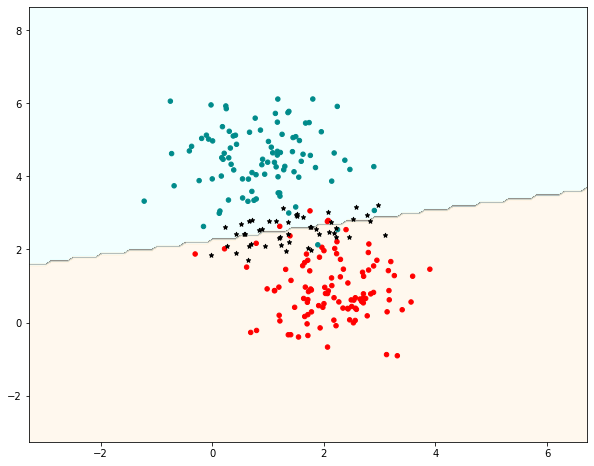

In [65]:
df = pd.read_csv('blobs2.csv')
y = df.label
X = df.drop('label', axis=1)
visual_svm(X, y, kernel='linear')

## kernel = rbf

Accuracy:  0.985


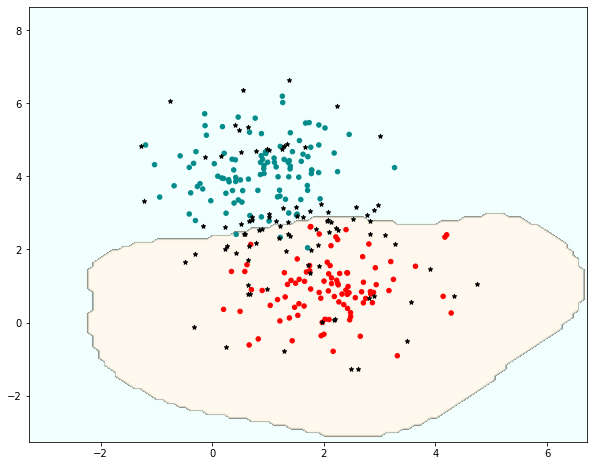

In [66]:
df = pd.read_csv('blobs2.csv')
y = df.label
X = df.drop('label', axis=1)
visual_svm(X, y, kernel='rbf')

## kernel = poly (degree = 2)

Accuracy:  0.975


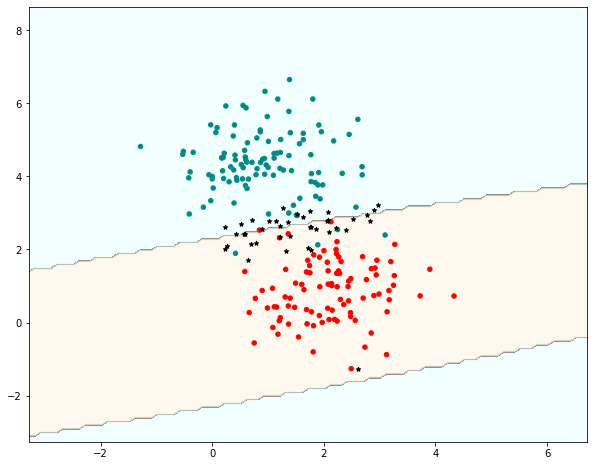

In [67]:
df = pd.read_csv('blobs2.csv')
y = df.label
X = df.drop('label', axis=1)
visual_svm(X, y, kernel='poly', degree=2)

## kernel = poly (degree = 3)

Accuracy:  0.98


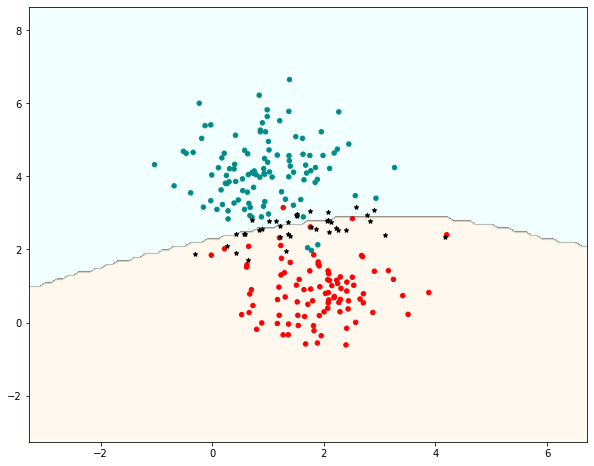

In [68]:
df = pd.read_csv('blobs2.csv')
y = df.label
X = df.drop('label', axis=1)
visual_svm(X, y, kernel='poly', degree=3)

## kernel = poly (degree = 5)

Accuracy:  0.985


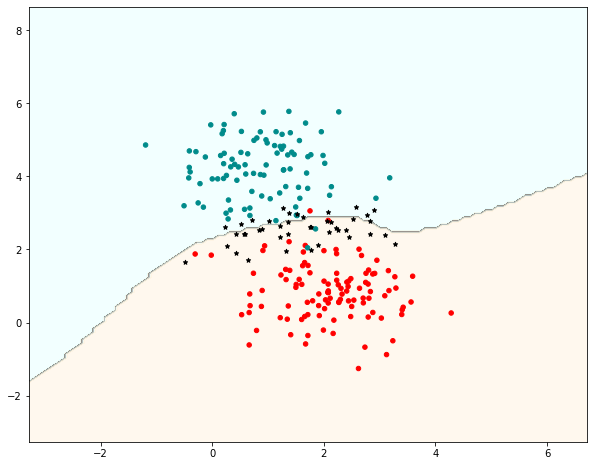

In [69]:
df = pd.read_csv('blobs2.csv')
y = df.label
X = df.drop('label', axis=1)
visual_svm(X, y, kernel='poly', degree=5)

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

## Cancer

In [24]:
df = pd.read_csv('cancer.csv')
y = df.label
X = df.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### SVM

In [26]:
%%time

model = svm.SVC(kernel='linear', C=1, gamma=1) 
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print('Accuracy: ', sum(predicted == y_test)/len(y_test))

Accuracy:  0.9649122807017544
Wall time: 3.01 s


### Random forest

In [33]:
%%time 

rf = RandomForestClassifier(n_estimators=20, max_depth=3)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print('Accuracy: ', sum(pred == y_test)/len(y_test))

Accuracy:  0.9649122807017544
Wall time: 43.9 ms


## Spam
### SVM

In [71]:
df = pd.read_csv('spam.csv')
y = df.label
X = df.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### SVM

In [36]:
%%time

model = svm.SVC(kernel='linear', C=1, gamma=1) 
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print('Accuracy: ', sum(predicted == y_test)/len(y_test))

Accuracy:  0.9261672095548317
Wall time: 4min 2s


### Random forest

In [72]:
%%time 

rf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print('Accuracy: ', sum(pred == y_test)/len(y_test))

Accuracy:  0.9239956568946797
Wall time: 360 ms
